In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
d = pd.read_csv("Social_Network_Ads.csv")
d.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
191,15662067,Female,19,26000,0


In [33]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Train test split of data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = d.drop( columns = ['Purchased' , 'Gender' , 'User ID'] , axis=1)   # <-  Age	, EstimatedSalary
y = d['Purchased']                  # <- Purchased

X_train, X_test, y_train, y_test = train_test_split ( x , y ,  test_size=0.20 ,  random_state=0 )

X_train.shape, X_test.shape

((320, 2), (80, 2))

# Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

# fit the scaler to the train set & it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
print( X_train , X_train_scaled) # X_train_scaled <- np array & X_train <- dataframe

     Age  EstimatedSalary
336   58           144000
64    59            83000
55    24            55000
106   26            35000
300   58            38000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[320 rows x 2 columns] [[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
np.round( X_train.describe() , 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [41]:
np.round( X_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


# Effect of Scaling

Text(0.5, 1.0, 'After')

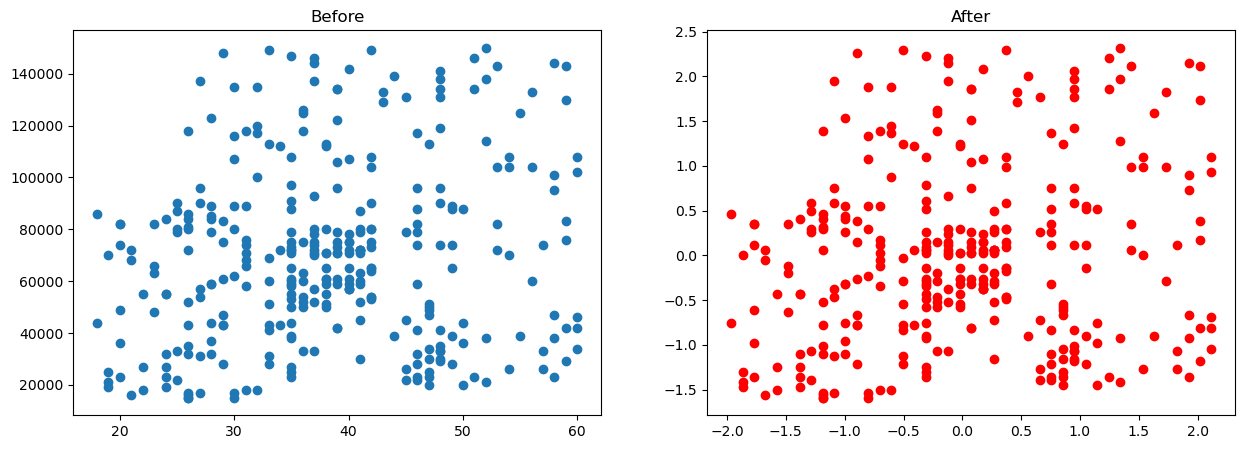

In [42]:
fig , ( ax1 , ax2 ) = plt.subplots( ncols=2 , figsize=( 15,5))
ax1.scatter( X_train['Age'] , X_train['EstimatedSalary'] )
ax1.set_title( 'Before')
ax2.scatter( X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'] , color='red')
ax2.set_title( 'After')

<Axes: title={'center': 'After'}, xlabel='Age', ylabel='Density'>

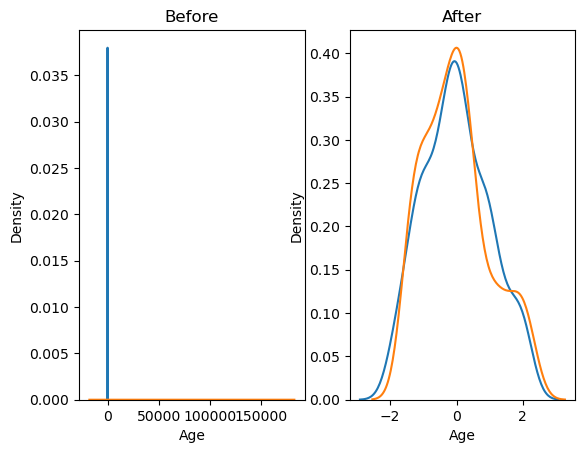

In [43]:
fig , ( ax1,ax2 ) = plt.subplots( ncols = 2 )
ax1.set_title('Before')
ax2.set_title('After')
sns.kdeplot( X_train['Age'] , ax = ax1)
sns.kdeplot( X_train['EstimatedSalary'] , ax=ax1)
sns.kdeplot( X_train_scaled['Age'] , ax = ax2)
sns.kdeplot( X_train_scaled['EstimatedSalary'] , ax=ax2)

in 1st one kde is flatted out bacause of scaling is diff

# Comparison of Distributions

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

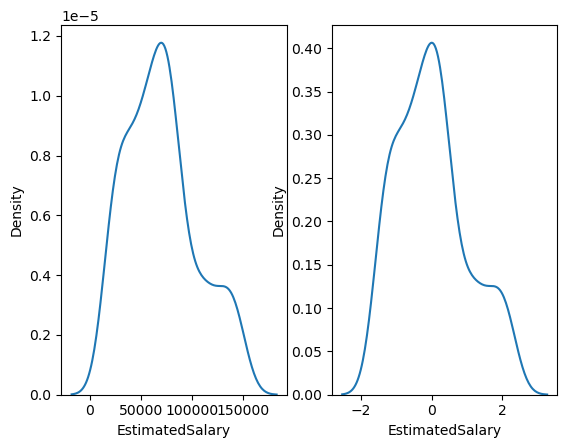

In [44]:
fig ,( ax1,ax2 ) = plt.subplots( ncols = 2 )
sns.kdeplot( X_train['EstimatedSalary'] , ax=ax1)
sns.kdeplot( X_train_scaled['EstimatedSalary'] , ax=ax2)

<Axes: xlabel='Age', ylabel='Density'>

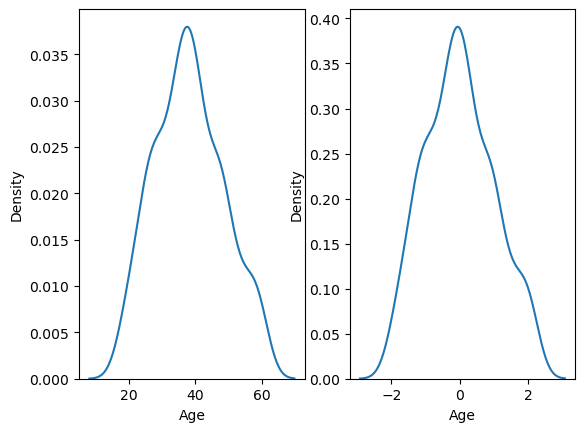

In [45]:
fig ,( ax1,ax2 ) = plt.subplots( ncols = 2 )
sns.kdeplot( X_train['Age'] , ax = ax1)
sns.kdeplot( X_train_scaled['Age'] , ax = ax2)

# Why scaling is important?

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
d1 = LogisticRegression()
d2 = LogisticRegression()

In [48]:
d1.fit( X_train , y_train)
d2.fit(  X_train_scaled , y_train )

LogisticRegression()

In [49]:
p1 = d1.predict( X_test )
p2 = d2.predict(  X_test_scaled )

In [50]:
print( accuracy_score( y_test , p1) , accuracy_score( y_test , p2))

0.9125 0.925


## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [52]:
d3 = DecisionTreeClassifier()
d4 = DecisionTreeClassifier()

In [53]:
d3.fit( X_train , y_train)
d4.fit( X_train_scaled , y_train )

DecisionTreeClassifier()

In [54]:
p3 = d3.predict( X_test )
p4 = d4.predict( X_test_scaled )

In [55]:
print( accuracy_score( y_test , p3) , accuracy_score( y_test , p4))

0.9 0.9125


# Effect of Outlier

In [67]:
df = pd.read_csv("Social_Network_Ads.csv")
df = df.drop(df.index[400:])
df = df.drop( columns=['User ID','Gender'])
df.shape

(400, 3)

In [68]:
outlier = pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000],   'Purchased': [0, 1, 1]}).astype(float)
df = pd.concat([df, outlier], ignore_index=True)
df.shape

(403, 3)

In [80]:
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split( df.drop(columns = ['Purchased']) , df['Purchased'] ,test_size=0.25 ,  random_state=0  )
print ( x_train2.shape, x_test2.shape )

x_train2_scal =  pd.DataFrame( scaler.transform(x_train2) , columns=X_train.columns)
x_test2_scal = pd.DataFrame( scaler.transform(x_test2)  , columns=X_train.columns)

d5 = LogisticRegression()
d6 = LogisticRegression()

d5.fit( x_train2 , y_train2 )
d6.fit( x_train2_scal , y_train2)

p7 = d5.predict( x_test2 )
p8 = d6.predict( x_test2_scal )

print( accuracy_score( y_test2 , p7) , accuracy_score( y_test2 , p8))

(302, 2) (101, 2)
0.8712871287128713 0.8712871287128713
